In [1]:
#importing libraries

import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Observations:

730 rows and 16 columns.
instant is a record index, lets remove this column.
we have month and year columns in dataframe. thus we can drop dteday columnas it not bringing any new information.
addition of casual and registered columns gives cnt column, thus we will drop these two as well.
there seems to be no missing values from non-null value count.
TARGET variable/column is 'cnt'

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [9]:
#renaming columns
df.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

In [10]:
#checking
df.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data visualization

categorical variable

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# remove uneccessary columns and create new data frame


df_1 = df[['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather', 'temp', 'atemp', 
            'Humidity', 'windspeed','Count']]
df_1.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


so all column are of numeric type but some columns actually represents categorical data

YEAR(MAPPING AND VISUALIZATION)

In [13]:
df_1['Year'] = df_1['Year'].map({0:'2018',1:'2019'})

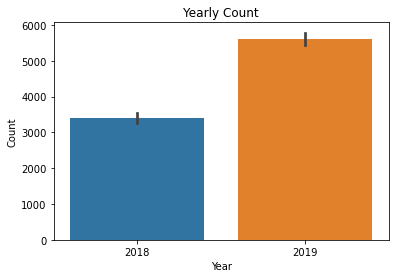

In [14]:
sns.barplot(df_1['Year'],df_1['Count'])
plt.title('Yearly Count')
plt.show()

so there is higher demand(average count) in 2019 then 2018

SEASON(mapping and visualization)

In [15]:
df_1['Season'] = df_1['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})


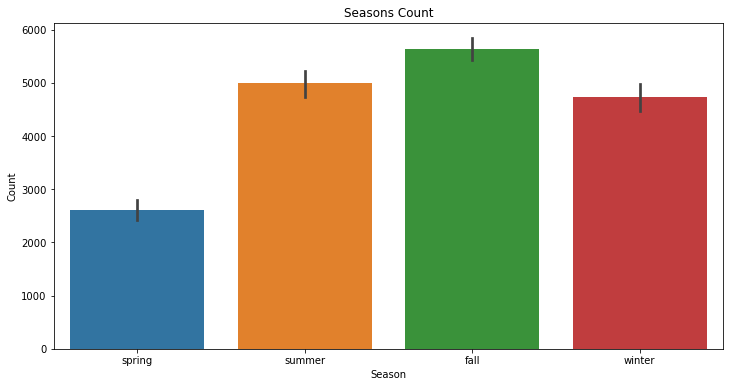

In [16]:
plt.figure(figsize=[12,6])
sns.barplot(df_1['Season'],df_1['Count'])
plt.title('Seasons Count')
plt.show()

so in fall there is highest demand of rented bike with spring came at last

MONTH(MAPPING AND VISUALIZATION)

In [17]:
df_1['Month'] = df_1['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})


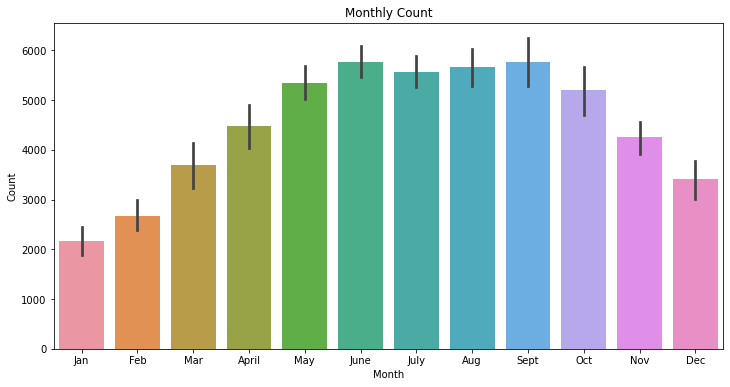

In [18]:
plt.figure(figsize=[12,6])
sns.barplot(df_1['Month'],df_1['Count'])
plt.title('Monthly Count')
plt.show()

average count of bikes in August, June, September, July are high and close to each other. company should meet this high demand.
January, February have the least demand.

WEEKDAY(MAPPING AND VISUALIZATION)

In [19]:
df_1['weekday'] = df_1['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})


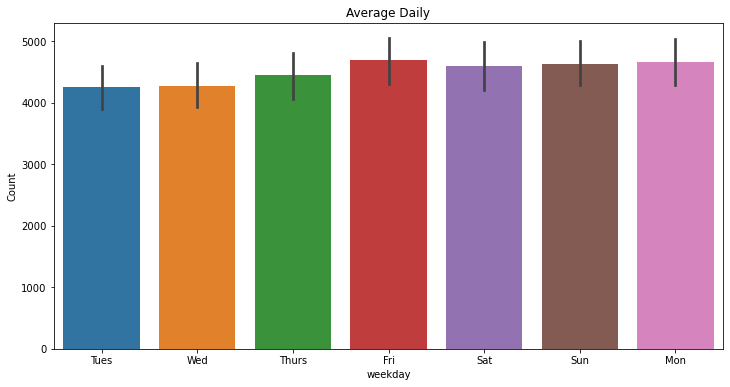

In [20]:
plt.figure(figsize=[12,6])
sns.barplot(df_1['weekday'],df_1['Count'])
plt.title('Average Daily')
plt.show()

close but weekend like friday,saturday,sunday had high demand.
tuesday,wednesday,thursday(middle week) had least demand

WORKING DAY MAPPING AND VISUALIZATION

In [21]:
df_1['workingday'] = df_1['workingday'].map({0:'No',1:'Yes'})

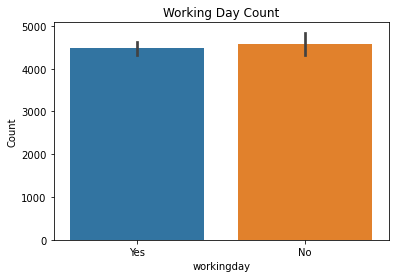

In [22]:
sns.barplot(df_1['workingday'],df_1['Count'])

plt.title('Working Day Count')
plt.show()


very close higher demand in non working day but its very close(almost similar)

HOLIDAY MAPPING AND VISUALIZATION

In [23]:
df_1['holiday'] = df_1['holiday'].map({0:'No',1:'Yes'})

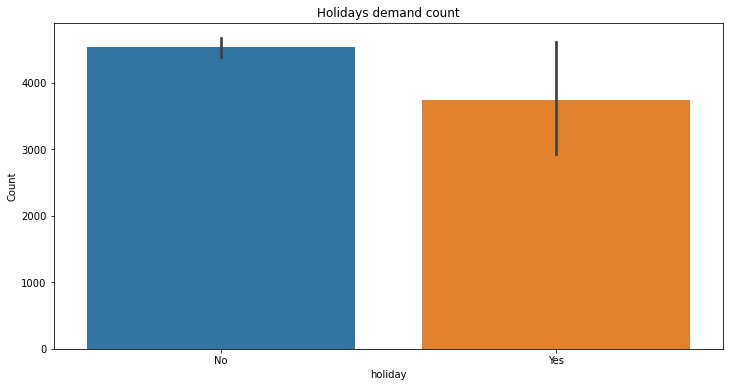

In [24]:
plt.figure(figsize=[12,6])
sns.barplot(df_1['holiday'],df_1['Count'])
plt.title('Holidays demand count')
plt.show()

higher demand in holiday

WEATHER MAPPING AND VISUALIZATION

In [25]:
df_1['Weather'] = df_1['Weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})


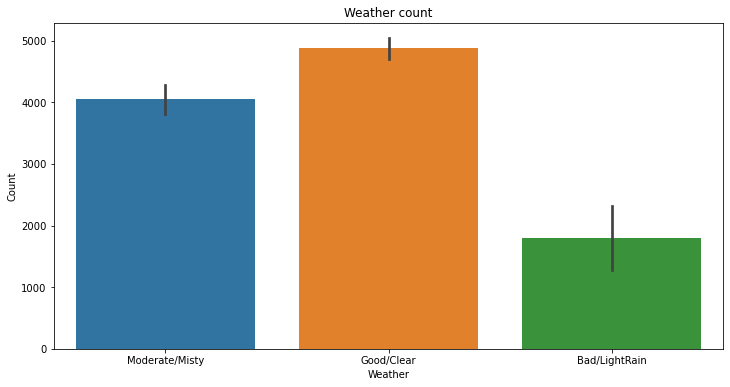

In [26]:
plt.figure(figsize=[12,6])
sns.barplot(df_1['Weather'],df_1['Count'])
plt.title('Weather count')
plt.show()

high demand in good weather and poor in bad weather

SO TEMP,WEATHER,MONTHS,SEASONS,WORKINGDAY ARE ALL GOOD PREDICTOR VARIABLE

NUMERICAL VARIABLE VISUALIZATION

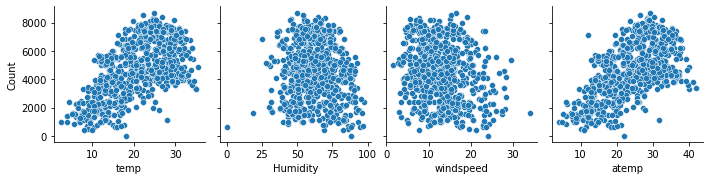

In [27]:
sns.pairplot(df_1,x_vars=['temp','Humidity','windspeed','atemp'], y_vars='Count',kind='scatter')


so there is linear relation in temp and atemp thus we can use linear regression there

In [28]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    object 
 2   Month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   Weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


so lets convert categorical variable into categorical datatype

DATA TYPE CORRECTION

In [29]:
x=['Month','holiday','Season', 'workingday','Year', 'Weather','weekday']
for i in x:
    df_1[i]=df_1[i].astype('category')

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      730 non-null    category
 1   Year        730 non-null    category
 2   Month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   Weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   Humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  Count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


NOW FOR LINEAR REGRESSION,WE NEED TO GET CATEGORICAL VARIABLES AS DUMMIES

In [31]:
dummies = pd.get_dummies(df_1[x], drop_first=True)
dummies.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_Yes,Season_spring,Season_summer,Season_winter,workingday_Yes,Year_2019,Weather_Good/Clear,Weather_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [32]:
df_final = pd.concat([df_1,dummies], axis=1)
df_final.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_Yes,Season_spring,Season_summer,Season_winter,workingday_Yes,Year_2019,Weather_Good/Clear,Weather_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,spring,2018,Jan,No,Tues,Yes,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,spring,2018,Jan,No,Wed,Yes,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
2,spring,2018,Jan,No,Thurs,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,spring,2018,Jan,No,Fri,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,spring,2018,Jan,No,Sat,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


so in this dataframe original categorical variables and there dummies both present so lets drop original categoricals

In [33]:
df_final.drop(x, axis=1, inplace = True)


In [34]:
df_final.head()

,temp,atemp,Humidity,windspeed,Count,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_Yes,Season_spring,Season_summer,Season_winter,workingday_Yes,Year_2019,Weather_Good/Clear,Weather_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


# splitting training and test data

In [35]:
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(df_final, train_size=0.70, random_state=100)


In [37]:
print(df_train.shape)
print(df_test.shape)
#it shows data is correctly splitted in 70-30

(510, 30)
(220, 30)


# SCALING

lets scale the range of numerical variable between 0 and 1

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()


In [40]:
numerics = ['windspeed','atemp','temp', 'Count','Humidity']


In [41]:
df_train[numerics] = scaler.fit_transform(df_train[numerics])

In [42]:
df_train[numerics].head()


,windspeed,atemp,temp,Count,Humidity
576,0.264686,0.766351,0.815169,0.827658,0.725633
426,0.255342,0.438975,0.442393,0.465255,0.640189
728,0.663106,0.200348,0.245101,0.204096,0.498067
482,0.188475,0.391735,0.395666,0.482973,0.504508
111,0.380981,0.318819,0.345824,0.191095,0.751824


so see numerical variable are scaled between zero and one

we know in multiple linear regression,reliable results are observed when independent variables are not correlated or least correlated

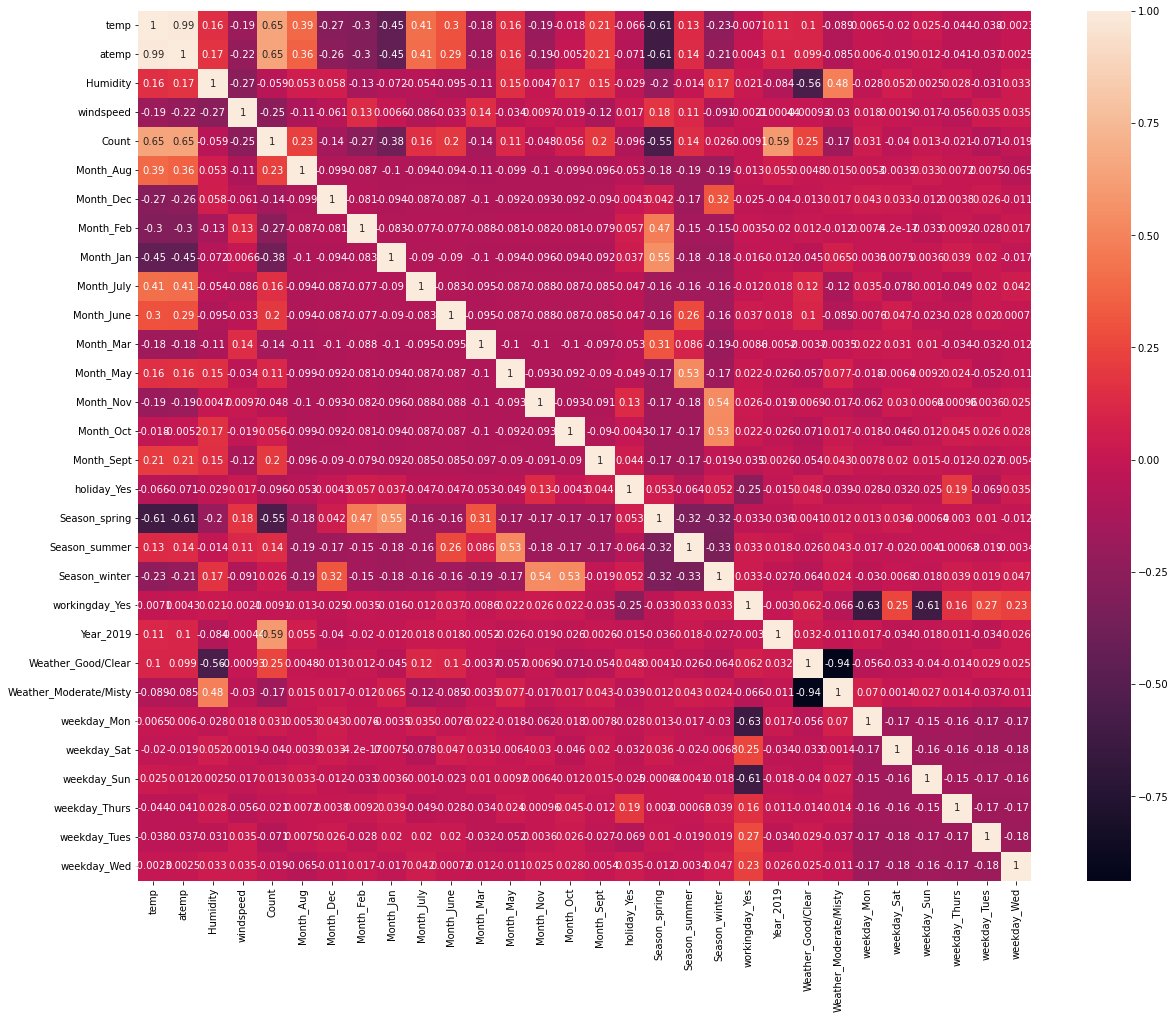

In [43]:
df_train_corr=df_train.corr()
plt.figure(figsize = [20,16])
sns.heatmap(df_train_corr,annot =True)
plt.show()

lets refer it later while building model to drop some of the variable

In [44]:
# lets devide train set into X_train and y_train

y_train = df_train.pop('Count')
X_train = df_train

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


we have 29 features which we have to eliminate(which is not important), we can use RFE to do these tedious

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)           
rfe = rfe.fit(X_train, y_train)

In [47]:
rfecolumn = X_train.columns[rfe.support_]
rfecolumn

Index(['temp', 'Humidity', 'windspeed', 'Month_Dec', 'Month_Jan', 'Month_July', 'Month_Nov', 'Month_Sept', 'holiday_Yes', 'Season_spring', 'Season_summer', 'Season_winter', 'Year_2019', 'Weather_Good/Clear', 'Weather_Moderate/Misty'], dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Month_Aug', 'Month_Feb', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Oct', 'workingday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'], dtype='object')

forming new data frame with selected feature

In [49]:
Xtrain_rfe = X_train[rfecolumn]
Xtrain_rfe.head()

,temp,Humidity,windspeed,Month_Dec,Month_Jan,Month_July,Month_Nov,Month_Sept,holiday_Yes,Season_spring,Season_summer,Season_winter,Year_2019,Weather_Good/Clear,Weather_Moderate/Misty
576,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0,1,1,0
426,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0,1,0,1
728,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0,1,1,0
482,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1,0,1,0,1
111,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1,0,0,0,1


# MODEL 1

In [50]:

import statsmodels.api as sm

X_trainlm1 = sm.add_constant(Xtrain_rfe)

lr1 = sm.OLS(y_train, X_trainlm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 17 May 2022   Prob (F-statistic):          8.15e-189
Time:                        21:55:54   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0732      0.048      1.540      0.124      -0.020       0.167
temp                       0.4815      0.037     13.005      0.000       0.409       0.554
Humidity                  -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                 -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Month_Dec                 -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Month_Jan                 -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Month_July                -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Month_Nov                 -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Month_Sept                 0.0755      0.017      4.466      0.000       0.042       0.109
holiday_Yes               -0.0911      0.026     -3.557      0.000      -0.141      -0.041
Season_spring             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
Season_summer              0.0423      0.015      2.761      0.006       0.012       0.072
Season_winter              0.1019      0.018      5.656      0.000       0.067       0.137
Year_2019                  0.2304      0.008     28.487      0.000       0.215       0.246
Weather_Good/Clear         0.2465      0.026      9.331      0.000       0.195       0.298
Weather_Moderate/Misty     0.1922      0.025      7.687      0.000       0.143       0.241
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is good and pvalue is under 5% so lets check VIF to check effect of variables on each other

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = Xtrain_rfe.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe.values, i) for i in range(Xtrain_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity,26.33
0,temp,25.12
13,Weather_Good/Clear,15.65
14,Weather_Moderate/Misty,9.30
9,Season_spring,5.75
2,windspeed,4.67
11,Season_winter,4.53
10,Season_summer,3.30
12,Year_2019,2.10
6,Month_Nov,1.91


so lets drop humidity as it had highest VIF

# MODEL2

In [52]:
Xtrain_rfe2 = Xtrain_rfe.drop('Humidity', axis = 1)

Xtrain_lm2 = sm.add_constant(Xtrain_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, Xtrain_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 17 May 2022   Prob (F-statistic):          4.75e-186
Time:                        21:55:54   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0467      0.039     -1.194      0.233      -0.124       0.030
temp                       0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                 -0.1585      0.025     -6.276      0.000      -0.208      -0.109
Month_Dec                 -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Month_Jan                 -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Month_July                -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Month_Nov                 -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Month_Sept                 0.0687      0.017      4.015      0.000       0.035       0.102
holiday_Yes               -0.0918      0.026     -3.522      0.000      -0.143      -0.041
Season_spring             -0.0713      0.021     -3.314      0.001      -0.113      -0.029
Season_summer              0.0349      0.015      2.251      0.025       0.004       0.065
Season_winter              0.0869      0.018      4.831      0.000       0.052       0.122
Year_2019                  0.2345      0.008     28.687      0.000       0.218       0.251
Weather_Good/Clear         0.2917      0.025     11.840      0.000       0.243       0.340
Weather_Moderate/Misty     0.2117      0.025      8.462      0.000       0.163       0.261
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is good and pvalue is under 5% so lets check VIF to check effect of variables on each other

In [53]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_rfe2.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe2.values, i) for i in range(Xtrain_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Weather_Good/Clear,15.65
0,temp,14.02
13,Weather_Moderate/Misty,8.82
1,windspeed,4.66
8,Season_spring,4.41
10,Season_winter,3.36
9,Season_summer,2.78
11,Year_2019,2.08
5,Month_Nov,1.89
3,Month_Jan,1.74


so lets drop Weather_Good/Clear	as it had highest VIF

# MODEL3

In [54]:
Xtrain_rfe3 = Xtrain_rfe2.drop('Weather_Moderate/Misty', axis = 1)


Xtrain_lm3 = sm.add_constant(Xtrain_rfe3)


lr3 = sm.OLS(y_train, Xtrain_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     169.1
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.01e-172
Time:                        21:55:54   Log-Likelihood:                 470.40
No. Observations:                 510   AIC:                            -912.8
Df Residuals:                     496   BIC:                            -853.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1442      0.034      4.222      0.000       0.077       0.211
temp                   0.4520      0.039     11.669      0.000       0.376       0.528
windspeed             -0.1798      0.027     -6.695      0.000      -0.233      -0.127
Month_Dec             -0.0317      0.019     -1.674      0.095      -0.069       0.005
Month_Jan             -0.0410      0.020     -2.091      0.037      -0.080      -0.002
Month_July            -0.0554      0.020     -2.802      0.005      -0.094      -0.017
Month_Nov             -0.0296      0.020     -1.449      0.148      -0.070       0.011
Month_Sept             0.0667      0.018      3.647      0.000       0.031       0.103
holiday_Yes           -0.0874      0.028     -3.139      0.002      -0.142      -0.033
Season_spring         -0.0662      0.023     -2.881      0.004      -0.111      -0.021
Season_summer          0.0405      0.017      2.447      0.015       0.008       0.073
Season_winter          0.0776      0.019      4.043      0.000       0.040       0.115
Year_2019              0.2380      0.009     27.280      0.000       0.221       0.255
Weather_Good/Clear     0.0960      0.009     10.571      0.000       0.078       0.114
==============================================================================
Omnibus:                      101.079   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.095
Skew:                          -0.908   Prob(JB):                     1.55e-71
Kurtosis:                       6.471   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SO Month_Nov had higher pvalue then 5% so lets drop it

# MODEL 4

In [55]:
Xtrain_rfe4 = Xtrain_rfe3.drop('Month_Nov', axis = 1)


Xtrain_lm4 = sm.add_constant(Xtrain_rfe4)


lr4 = sm.OLS(y_train, Xtrain_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 17 May 2022   Prob (F-statistic):          2.07e-173
Time:                        21:55:54   Log-Likelihood:                 469.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     497   BIC:                            -857.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1324      0.033      3.988      0.000       0.067       0.198
temp                   0.4664      0.037     12.446      0.000       0.393       0.540
windspeed             -0.1802      0.027     -6.703      0.000      -0.233      -0.127
Month_Dec             -0.0209      0.017     -1.199      0.231      -0.055       0.013
Month_Jan             -0.0375      0.019     -1.922      0.055      -0.076       0.001
Month_July            -0.0552      0.020     -2.790      0.005      -0.094      -0.016
Month_Sept             0.0708      0.018      3.916      0.000       0.035       0.106
holiday_Yes           -0.0923      0.028     -3.334      0.001      -0.147      -0.038
Season_spring         -0.0602      0.023     -2.661      0.008      -0.105      -0.016
Season_summer          0.0446      0.016      2.729      0.007       0.012       0.077
Season_winter          0.0706      0.019      3.796      0.000       0.034       0.107
Year_2019              0.2378      0.009     27.233      0.000       0.221       0.255
Weather_Good/Clear     0.0953      0.009     10.494      0.000       0.077       0.113
==============================================================================
Omnibus:                       94.595   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.484
Skew:                          -0.868   Prob(JB):                     3.75e-63
Kurtosis:                       6.242   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SO Month_Dec had higher pvalue then 5% so lets drop it

# MODEL 5

In [56]:
Xtrain_rfe5 = Xtrain_rfe4.drop('Month_Dec', axis = 1)


Xtrain_lm5 = sm.add_constant(Xtrain_rfe5)


lr5 = sm.OLS(y_train, Xtrain_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.9
Date:                Tue, 17 May 2022   Prob (F-statistic):          2.93e-174
Time:                        21:55:54   Log-Likelihood:                 468.59
No. Observations:                 510   AIC:                            -913.2
Df Residuals:                     498   BIC:                            -862.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1230      0.032      3.811      0.000       0.060       0.186
temp                   0.4767      0.036     13.062      0.000       0.405       0.548
windspeed             -0.1767      0.027     -6.610      0.000      -0.229      -0.124
Month_Jan             -0.0324      0.019     -1.704      0.089      -0.070       0.005
Month_July            -0.0555      0.020     -2.804      0.005      -0.094      -0.017
Month_Sept             0.0725      0.018      4.018      0.000       0.037       0.108
holiday_Yes           -0.0913      0.028     -3.298      0.001      -0.146      -0.037
Season_spring         -0.0591      0.023     -2.614      0.009      -0.104      -0.015
Season_summer          0.0468      0.016      2.880      0.004       0.015       0.079
Season_winter          0.0693      0.019      3.733      0.000       0.033       0.106
Year_2019              0.2378      0.009     27.218      0.000       0.221       0.255
Weather_Good/Clear     0.0951      0.009     10.472      0.000       0.077       0.113
==============================================================================
Omnibus:                       92.324   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.195
Skew:                          -0.854   Prob(JB):                     1.75e-60
Kurtosis:                       6.168   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SO Month_Jan had higher pvalue then 5% so lets drop it

# MODEL 6

In [57]:
Xtrain_rfe6 = Xtrain_rfe5.drop('Month_Jan', axis = 1)


Xtrain_lm6 = sm.add_constant(Xtrain_rfe6)

lr6 = sm.OLS(y_train, Xtrain_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.6
Date:                Tue, 17 May 2022   Prob (F-statistic):          8.19e-175
Time:                        21:55:54   Log-Likelihood:                 467.10
No. Observations:                 510   AIC:                            -912.2
Df Residuals:                     499   BIC:                            -865.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1088      0.031      3.483      0.001       0.047       0.170
temp                   0.4927      0.035     13.944      0.000       0.423       0.562
windspeed             -0.1706      0.027     -6.427      0.000      -0.223      -0.118
Month_July            -0.0569      0.020     -2.872      0.004      -0.096      -0.018
Month_Sept             0.0729      0.018      4.033      0.000       0.037       0.108
holiday_Yes           -0.0919      0.028     -3.315      0.001      -0.146      -0.037
Season_spring         -0.0638      0.022     -2.836      0.005      -0.108      -0.020
Season_summer          0.0494      0.016      3.048      0.002       0.018       0.081
Season_winter          0.0745      0.018      4.063      0.000       0.038       0.111
Year_2019              0.2372      0.009     27.118      0.000       0.220       0.254
Weather_Good/Clear     0.0957      0.009     10.529      0.000       0.078       0.114
==============================================================================
Omnibus:                       91.943   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.468
Skew:                          -0.850   Prob(JB):                     2.51e-60
Kurtosis:                       6.166   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is good and pvalue is under 5% so lets check VIF to check effect of variables on each other

In [58]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_rfe6.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe6.values, i) for i in range(Xtrain_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.75
1,windspeed,4.55
9,Weather_Good/Clear,2.71
6,Season_summer,2.19
5,Season_spring,2.12
8,Year_2019,2.06
7,Season_winter,1.74
2,Month_July,1.59
3,Month_Sept,1.32
4,holiday_Yes,1.04


so temp variable had high vif so eliminate it

# MODEL 7

In [59]:
Xtrain_rfe7 = Xtrain_rfe6.drop('Month_July', axis = 1)

Xtrain_lm7 = sm.add_constant(Xtrain_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_train, Xtrain_lm7).fit()

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 17 May 2022   Prob (F-statistic):          3.04e-174
Time:                        21:55:54   Log-Likelihood:                 462.92
No. Observations:                 510   AIC:                            -905.8
Df Residuals:                     500   BIC:                            -863.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1009      0.031      3.218      0.001       0.039       0.162
temp                   0.4782      0.035     13.576      0.000       0.409       0.547
windspeed             -0.1711      0.027     -6.398      0.000      -0.224      -0.119
Month_Sept             0.0884      0.017      5.083      0.000       0.054       0.123
holiday_Yes           -0.0906      0.028     -3.245      0.001      -0.145      -0.036
Season_spring         -0.0509      0.022     -2.292      0.022      -0.094      -0.007
Season_summer          0.0665      0.015      4.382      0.000       0.037       0.096
Season_winter          0.0884      0.018      4.958      0.000       0.053       0.123
Year_2019              0.2378      0.009     27.008      0.000       0.221       0.255
Weather_Good/Clear     0.0944      0.009     10.318      0.000       0.076       0.112
==============================================================================
Omnibus:                       94.652   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.230
Skew:                          -0.883   Prob(JB):                     1.04e-60
Kurtosis:                       6.144   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is good and pvalue is under 5% so lets check VIF to check effect of variables on each other

In [60]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_rfe7.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe7.values, i) for i in range(Xtrain_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.66
1,windspeed,4.54
8,Weather_Good/Clear,2.70
7,Year_2019,2.06
4,Season_spring,2.02
5,Season_summer,1.85
6,Season_winter,1.57
2,Month_Sept,1.22
3,holiday_Yes,1.04


# MODEL 8

In [61]:
Xtrain_rfe8 = Xtrain_rfe7.drop('Season_spring', axis = 1)

Xtrain_lm8 = sm.add_constant(Xtrain_rfe8)

lr8 = sm.OLS(y_train, Xtrain_lm8).fit()

lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.2
Date:                Tue, 17 May 2022   Prob (F-statistic):          2.45e-174
Time:                        21:55:55   Log-Likelihood:                 460.26
No. Observations:                 510   AIC:                            -902.5
Df Residuals:                     501   BIC:                            -864.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0417      0.018      2.337      0.020       0.007       0.077
temp                   0.5428      0.021     25.540      0.000       0.501       0.585
windspeed             -0.1756      0.027     -6.559      0.000      -0.228      -0.123
Month_Sept             0.0978      0.017      5.761      0.000       0.064       0.131
holiday_Yes           -0.0928      0.028     -3.312      0.001      -0.148      -0.038
Season_summer          0.0903      0.011      8.152      0.000       0.069       0.112
Season_winter          0.1205      0.011     10.863      0.000       0.099       0.142
Year_2019              0.2366      0.009     26.806      0.000       0.219       0.254
Weather_Good/Clear     0.0939      0.009     10.226      0.000       0.076       0.112
==============================================================================
Omnibus:                       88.063   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.486
Skew:                          -0.853   Prob(JB):                     1.21e-51
Kurtosis:                       5.851   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_rfe8.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe8.values, i) for i in range(Xtrain_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.35
1,windspeed,3.08
7,Weather_Good/Clear,2.55
6,Year_2019,2.00
4,Season_summer,1.55
5,Season_winter,1.33
2,Month_Sept,1.20
3,holiday_Yes,1.04


so now Rsquare is 80.8% which is a good number,p values are within limit and vif is less than 10%

# RESULT

const = 0.0417
temp = 0.5428
windspeed = -0.1756
Month_Sept = 0.0978
holiday_Yes = -0.0928
Season_summer = 0.0903
Season_winter = 0.1205
Year_2019 = 0.2366
Weather_Good/Clear = 0.0939

NULL HYPOTHESIS SAYS ALL COAFICIENT IS EQUAL TO ZERO WHICH IS NOT THE CASE HERE SO WE CAN REJECT THE NULL HYPOTHESIS

# MODEL SIGNIFICANCE

higher f-statistic(than 1) and close to zero p-statistic indicate significant model

# checking assumptions

lets check assumption of Homoscedasticity

In [63]:
ytrain_pred = lr8.predict(Xtrain_lm8)


In [64]:
#checking residue
res = y_train - ytrain_pred

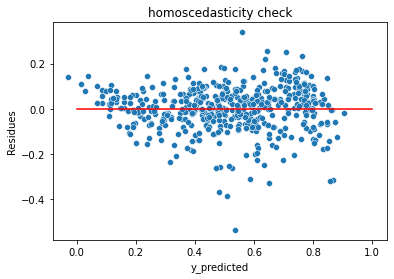

In [65]:
sns.scatterplot(ytrain_pred,res)
plt.xlabel('y_predicted')
plt.ylabel('Residues')

p = sns.lineplot([0,1],[0,0],color='r')
p = plt.title('homoscedasticity check')

so residue plot is not following any pattern but totally random. so this assumption is valid

second assumption is error coafficient should be normal in nature

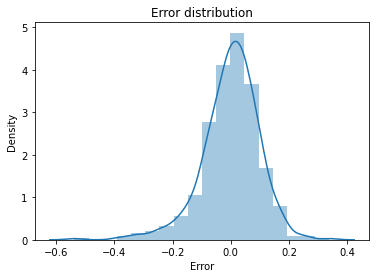

In [66]:
sns.distplot((res), bins = 18)
plt.title('Error distribution')        
plt.xlabel('Error')
plt.show()

so assumption is valid

# TEST data prediction

In [67]:
#lets scale test data first
from sklearn.preprocessing import MinMaxScaler

In [68]:
numerics = ['windspeed','atemp','temp', 'Count','Humidity']


In [69]:
df_test[numerics]=scaler.transform(df_test[numerics])


In [72]:
df_test.head()


,temp,atemp,Humidity,windspeed,Count,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_Yes,Season_spring,Season_summer,Season_winter,workingday_Yes,Year_2019,Weather_Good/Clear,Weather_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
221,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


so just like train data,do the division

In [73]:
Xtest = df_test
ytest = df_test.pop('Count')



In [74]:
testcol = Xtrain_rfe8.columns

Xtest = Xtest[testcol]

Xtest_lm8 = sm.add_constant(Xtest)

Xtest_lm8.head()

,const,temp,windspeed,Month_Sept,holiday_Yes,Season_summer,Season_winter,Year_2019,Weather_Good/Clear
184,1.0,0.831783,0.084219,0,1,0,0,0,0
535,1.0,0.901354,0.153728,0,0,1,0,1,1
299,1.0,0.511964,0.334206,0,0,0,1,0,0
221,1.0,0.881625,0.339570,0,0,0,0,0,1
152,1.0,0.817246,0.537414,0,0,1,0,0,1


# finally evaluate the model

In [75]:
ytest_pred = lr8.predict(Xtest_lm8)

Text(0, 0.5, 'ytest_pred')

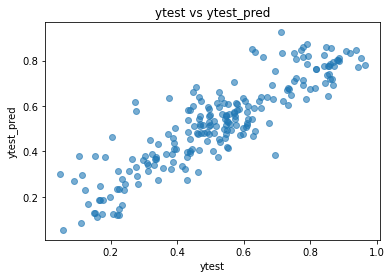

In [76]:
plt.scatter(ytest, ytest_pred, alpha=.6)
plt.title('ytest vs ytest_pred')              
plt.xlabel('ytest')                          
plt.ylabel('ytest_pred') 

thus same linearity is present in test data,its good

best fitted line equation

count=0.0417+temp*0.5428-windspeed*0.1756+seasonwinter*0.1205+seasonsummer*0.0903+year2019*0.2366+monthsept*0.0978-holidayyes*0.0928+weathergood/clear*0.0939

lets check r2 and adjusted r2 of train and test data

In [79]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, ytrain_pred)
r2_test = r2_score(ytest, ytest_pred)

print('Test r^2 :',round((r2_test*100),2))
print('Train r^2 :',round((r2_train*100),2))

Test r^2 : 78.32
Train r^2 : 80.84


so difference of around 2%,which is totally fine

In [80]:
n = Xtest.shape[0]
n1 = Xtrain_rfe8.shape[0]

p = Xtest.shape[1]
p1 = Xtrain_rfe8.shape[1]



adjustedr2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjustedr2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test adjusted r^2 :',round((adjustedr2_test*100),2))
print('Train adjusted r^2 :',round((adjustedr2_train*100),2))

Test adjusted r^2 : 77.5
Train adjusted r^2 : 80.53
